In [8]:
airlines = pd.read_csv("data/airlines.csv")
airlines["Time"] = pd.to_datetime(airlines["Time.Label"], infer_datetime_format=True)
airlines = airlines[~(airlines["Time.Year"].isin([2003, 2016]))]

airlines.columns

Index(['Airport.Code', 'Airport.Name', 'Time.Label', 'Time.Month',
       'Time.Month Name', 'Time.Year', 'Statistics.# of Delays.Carrier',
       'Statistics.# of Delays.Late Aircraft',
       'Statistics.# of Delays.National Aviation System',
       'Statistics.# of Delays.Security', 'Statistics.# of Delays.Weather',
       'Statistics.Carriers.Names', 'Statistics.Carriers.Total',
       'Statistics.Flights.Cancelled', 'Statistics.Flights.Delayed',
       'Statistics.Flights.Diverted', 'Statistics.Flights.On Time',
       'Statistics.Flights.Total', 'Statistics.Minutes Delayed.Carrier',
       'Statistics.Minutes Delayed.Late Aircraft',
       'Statistics.Minutes Delayed.National Aviation System',
       'Statistics.Minutes Delayed.Security',
       'Statistics.Minutes Delayed.Total',
       'Statistics.Minutes Delayed.Weather', 'Time'],
      dtype='object')

<AxesSubplot:title={'center':'Airline Delays'}, xlabel='Time.Label', ylabel='# Delays due to Late Aircraft'>

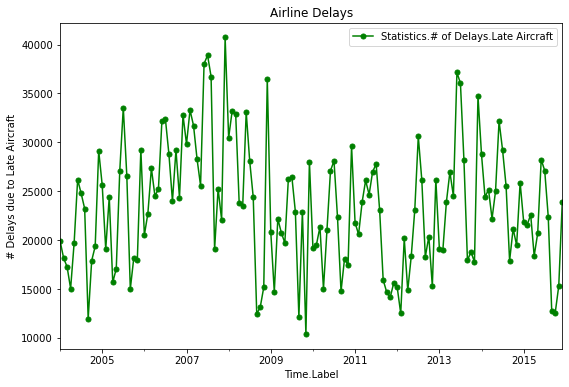

In [38]:
import pandas as pd
airlines = pd.read_csv("data/airlines.csv", parse_dates=['Time.Label'])
airlines = airlines[airlines["Time.Year"]>2003]
airlines = airlines[airlines["Time.Year"]<2016]

delays_by_time_and_cause = (
   airlines[["Time.Label", "Statistics.# of Delays.Late Aircraft", "Statistics.# of Delays.Weather", 
             "Statistics.# of Delays.Security", "Statistics.# of Delays.Carrier"]]
   .groupby("Time.Label")
   .sum()
   .reset_index()
)

delays_by_time_and_cause.plot(kind='line', x="Time.Label", y="Statistics.# of Delays.Late Aircraft", 
                              ylabel = "# Delays due to Late Aircraft",
                              marker="o", markersize=5, linestyle="-", color="g", title='Airline Delays',
                              figsize=(9,6))

<AxesSubplot:title={'center':'Airline Delays Frequency'}, ylabel='Frequency'>

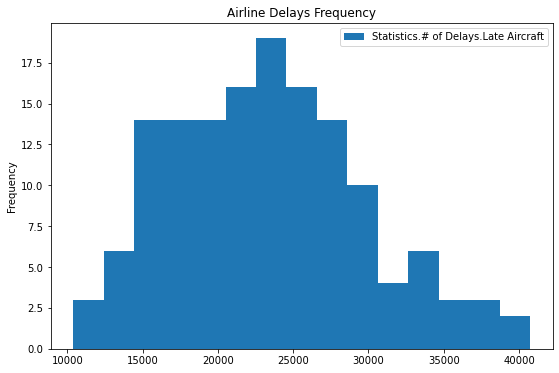

In [30]:
import pandas as pd
airlines = pd.read_csv("data/airlines.csv", parse_dates=['Time.Label'])
airlines = airlines[airlines["Time.Year"]>2003]
airlines = airlines[airlines["Time.Year"]<2016]

delays_by_time_and_cause = (
   airlines[["Time.Label", "Statistics.# of Delays.Late Aircraft", "Statistics.# of Delays.Weather", 
             "Statistics.# of Delays.Security", "Statistics.# of Delays.Carrier"]]
   .groupby("Time.Label")
   .sum()
   .reset_index()
)

delays_by_time_and_cause.plot(kind='hist', x="Time.Label", y="Statistics.# of Delays.Late Aircraft",  bins=15,
                              xlabel = "Monthly Frequency Delays due to Late Aircraft",
                              title='Airline Delays Frequency',
                              figsize=(9,6))

,0
index,
Statistics.# of Delays.Late Aircraft,3357596
Statistics.# of Delays.Weather,327766
Statistics.# of Delays.Security,23012
Statistics.# of Delays.Carrier,2431808


<AxesSubplot:title={'center':'Airline Delays Frequency'}, xlabel='Monthly Frequency Delays due to Late Aircraft'>

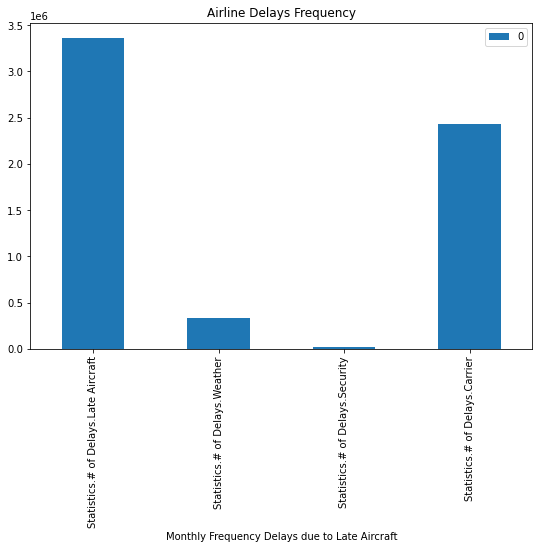

In [52]:
import pandas as pd
airlines = pd.read_csv("data/airlines.csv", parse_dates=['Time.Label'])
airlines = airlines[airlines["Time.Year"]>2003]
airlines = airlines[airlines["Time.Year"]<2016]

delays_by_time_and_cause = (
   airlines[["Statistics.# of Delays.Late Aircraft", "Statistics.# of Delays.Weather", 
             "Statistics.# of Delays.Security", "Statistics.# of Delays.Carrier"]]
   .sum()
   .reset_index()
)

delays_by_time_and_cause.set_index('index', inplace=True)

display(delays_by_time_and_cause)

delays_by_time_and_cause.plot(kind='bar', 
                              xlabel = "Monthly Frequency Delays due to Late Aircraft",
                              title='Airline Delays Frequency',
                              figsize=(9,6))

<AxesSubplot:title={'center':'Airline Delays Frequency'}, xlabel='Monthly Frequency Delays due to Late Aircraft'>

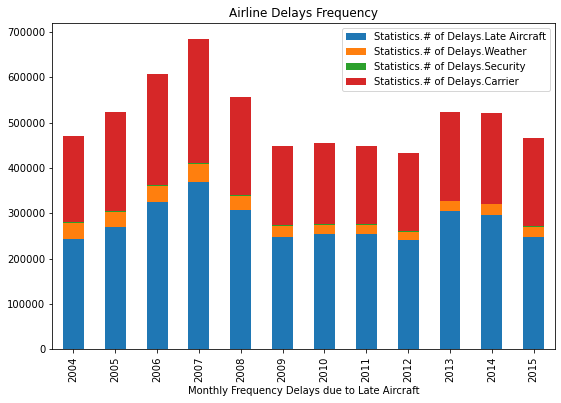

In [55]:
import pandas as pd
airlines = pd.read_csv("data/airlines.csv", parse_dates=['Time.Label'])
airlines = airlines[airlines["Time.Year"]>2003]
airlines = airlines[airlines["Time.Year"]<2016]

delays_by_time_and_cause = (
   airlines[["Time.Year", "Statistics.# of Delays.Late Aircraft", "Statistics.# of Delays.Weather", 
             "Statistics.# of Delays.Security", "Statistics.# of Delays.Carrier"]]
   .groupby("Time.Year")
   .sum()
   .reset_index()
)

delays_by_time_and_cause.plot(kind='bar', x="Time.Year",stacked=True,  
                              xlabel = "Monthly Frequency Delays due to Late Aircraft",
                              title='Airline Delays Frequency',
                              figsize=(9,6))